# Model Validation

In [2]:
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()

In [18]:
X = iris.data
true_y = iris.target

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
model = KNeighborsClassifier(n_neighbors=1)

In [19]:
model.fit(X,true_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [20]:
predicted_y = model.predict(X)

In [21]:
predicted_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
true_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(true_y, predicted_y)

1.0

In [38]:
from sklearn.model_selection import train_test_split

In [46]:
train_X, test_X, train_y, test_y = train_test_split(X, true_y, train_size = 0.5)

In [47]:
len(test_X)

75

In [58]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [59]:
accuracy_score(test_y, model.predict(test_X))

0.9866666666666667

## Cross-validation

In [63]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [76]:
cross_val_score(KNeighborsClassifier(n_neighbors=1), X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [77]:
from sklearn.model_selection import LeaveOneOut

In [82]:
for i in range(1,39,2):
    print(f" {i}-nn acc: {np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=i), X, y, cv=LeaveOneOut()))}")
    

 1-nn acc: 0.96
 3-nn acc: 0.96
 5-nn acc: 0.9666666666666667
 7-nn acc: 0.9666666666666667
 9-nn acc: 0.9666666666666667
 11-nn acc: 0.9733333333333334
 13-nn acc: 0.9666666666666667
 15-nn acc: 0.9733333333333334
 17-nn acc: 0.9733333333333334
 19-nn acc: 0.98
 21-nn acc: 0.98
 23-nn acc: 0.9666666666666667
 25-nn acc: 0.9666666666666667
 27-nn acc: 0.9666666666666667
 29-nn acc: 0.9533333333333334
 31-nn acc: 0.9466666666666667
 33-nn acc: 0.9533333333333334
 35-nn acc: 0.9533333333333334
 37-nn acc: 0.9466666666666667


In [91]:
from sklearn.svm import LinearSVC, SVC
import seaborn as sns

/Users/aca/anaconda3/envs/min720/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/aca/anaconda3/envs/min720/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [92]:
results = []
for c in np.linspace(0.01, 20.0, 30):
    results.append([c, np.mean(cross_val_score(SVC(C=c), X, y, cv=LeaveOneOut()))])

In [95]:
results = np.array(results)

In [96]:
results

array([[1.00000000e-02, 0.00000000e+00],
       [6.99310345e-01, 9.53333333e-01],
       [1.38862069e+00, 9.60000000e-01],
       [2.07793103e+00, 9.66666667e-01],
       [2.76724138e+00, 9.80000000e-01],
       [3.45655172e+00, 9.80000000e-01],
       [4.14586207e+00, 9.80000000e-01],
       [4.83517241e+00, 9.80000000e-01],
       [5.52448276e+00, 9.80000000e-01],
       [6.21379310e+00, 9.73333333e-01],
       [6.90310345e+00, 9.73333333e-01],
       [7.59241379e+00, 9.66666667e-01],
       [8.28172414e+00, 9.66666667e-01],
       [8.97103448e+00, 9.73333333e-01],
       [9.66034483e+00, 9.73333333e-01],
       [1.03496552e+01, 9.73333333e-01],
       [1.10389655e+01, 9.66666667e-01],
       [1.17282759e+01, 9.66666667e-01],
       [1.24175862e+01, 9.66666667e-01],
       [1.31068966e+01, 9.60000000e-01],
       [1.37962069e+01, 9.66666667e-01],
       [1.44855172e+01, 9.66666667e-01],
       [1.51748276e+01, 9.66666667e-01],
       [1.58641379e+01, 9.66666667e-01],
       [1.655344

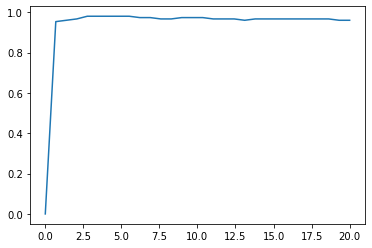

In [98]:
sns.lineplot(results[:,0],results[:,1])

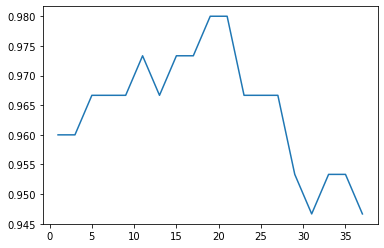

In [101]:
results = []
for i in range(1,39,2):
    results.append([i, np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=i), X, y, cv=LeaveOneOut()))])    
results = np.array(results)
sns.lineplot(results[:,0],results[:,1])

## Decision Trees

In [122]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [120]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=0)

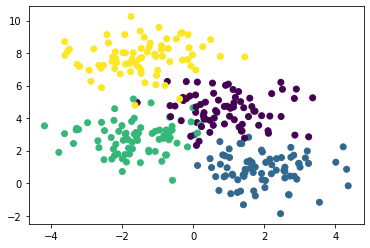

In [123]:
plt.scatter(X[:,0], X[:,1], c=y)

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [126]:
tree = DecisionTreeClassifier().fit(X,y)


In [129]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

/Users/aca/anaconda3/envs/min720/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


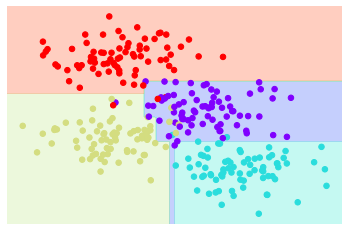

In [144]:
visualize_classifier(DecisionTreeClassifier(max_depth=5), X, y)

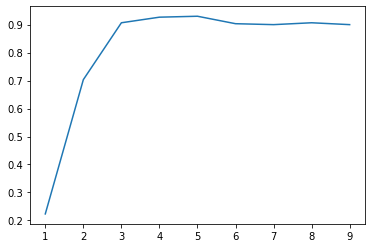

In [137]:
results = []
for i in range(1,10,1):
    results.append([i, np.mean(cross_val_score(DecisionTreeClassifier(max_depth=i), X, y, cv=LeaveOneOut()))])    
results = np.array(results)
sns.lineplot(results[:,0],results[:,1])

# Random Forests

In [139]:
from sklearn.ensemble import BaggingClassifier

/Users/aca/anaconda3/envs/min720/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


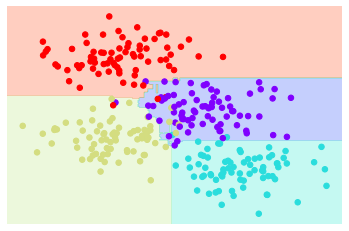

In [143]:
tree = DecisionTreeClassifier(max_depth=5)
ensemble = BaggingClassifier(tree, n_estimators=100, max_samples=0.8)
visualize_classifier(ensemble, X, y)

In [145]:
from sklearn.ensemble import RandomForestClassifier

# Example

In [146]:
from sklearn.datasets import load_digits

In [147]:
digits = load_digits()

In [148]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [149]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

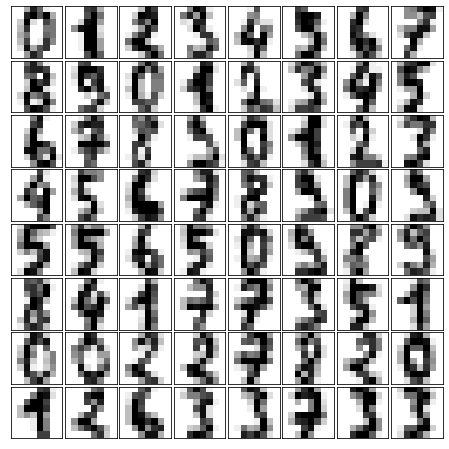

In [150]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

In [151]:
digits.target[0:64]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3])

In [152]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [170]:
model = RandomForestClassifier(n_estimators=200).fit(X_train, y_train)

In [171]:
accuracy_score(model.predict(X_test), y_test)

0.9622222222222222

In [172]:
from sklearn.metrics import classification_report, confusion_matrix

In [173]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        45
           1       0.95      1.00      0.97        35
           2       0.97      1.00      0.99        37
           3       0.97      0.88      0.92        41
           4       0.98      0.98      0.98        51
           5       0.94      1.00      0.97        44
           6       1.00      0.98      0.99        48
           7       0.89      0.98      0.94        52
           8       0.98      0.89      0.93        47
           9       0.98      0.94      0.96        50

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



In [174]:
cm = confusion_matrix(y_test, model.predict(X_test))

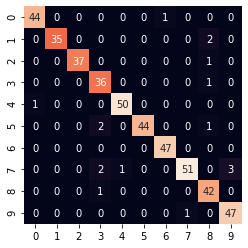

In [175]:
sns.heatmap(cm.T, square=True, annot=True, cbar=False)

In [178]:
import pandas as pd

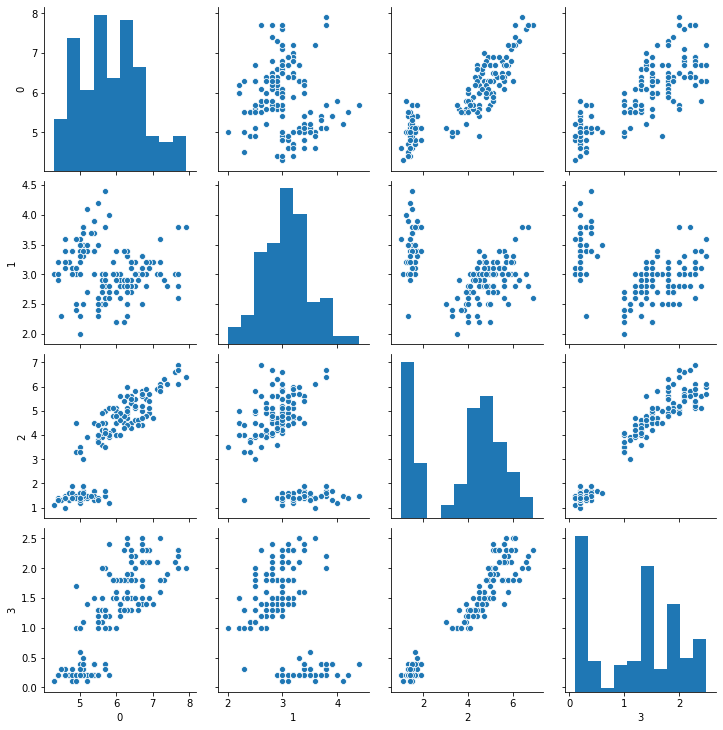

In [183]:
sns.pairplot(pd.DataFrame(iris.data))

In [193]:
from  sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [198]:
digits2d = TSNE().fit_transform(digits.data)

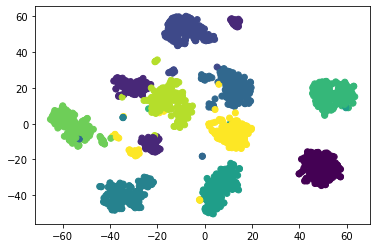

In [199]:
plt.scatter(digits2d[:,0], digits2d[:,1], c=digits.target)

In [200]:
digits2dPCA = PCA().fit_transform(digits.data)

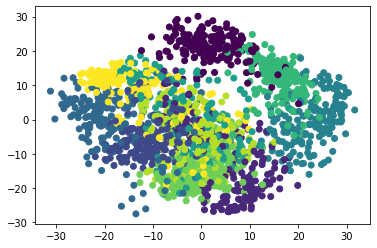

In [201]:
plt.scatter(digits2dPCA[:,0], digits2dPCA[:,1], c=digits.target)